# NLP : Twitter Sentiment Analysis

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [5]:
# Loading the dataset 
tweets_df = pd.read_csv('twitter.csv')

In [6]:
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
tweets_df = tweets_df.drop(['id'], axis = 1)

In [8]:
tweets_df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [9]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 374.6+ KB


In [10]:
tweets_df.describe()

,label
count,31962.000000
mean,0.070146
std,0.255397
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# Exploring the dataset

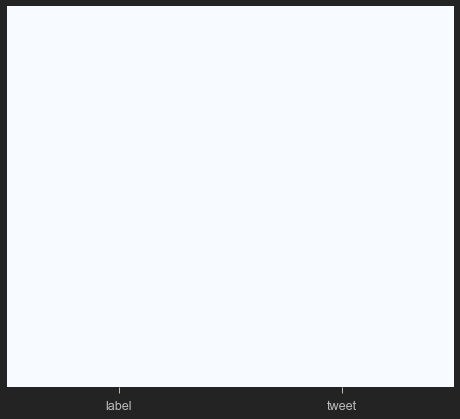

In [11]:
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues');

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

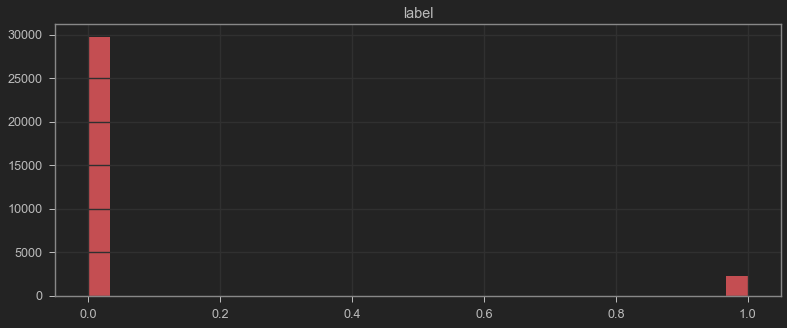

In [12]:
tweets_df.hist(bins = 30, figsize=(13,5), color = 'r')

c:\users\rk\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


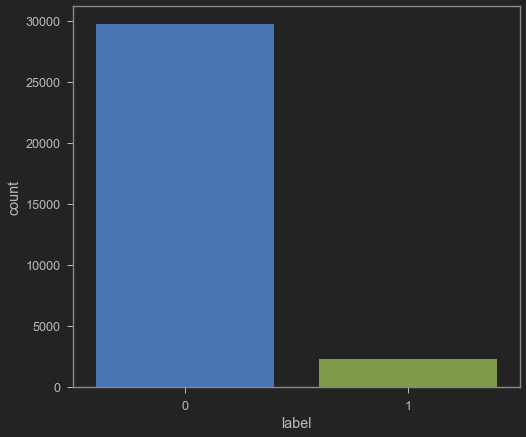

In [13]:
sns.countplot(tweets_df['label'], label = 'count');

In [14]:
# create another column for the lengths of the tweets 
tweets_df['length'] = tweets_df['tweet'].apply(len)
tweets_df.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


c:\users\rk\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length', ylabel='Density'>

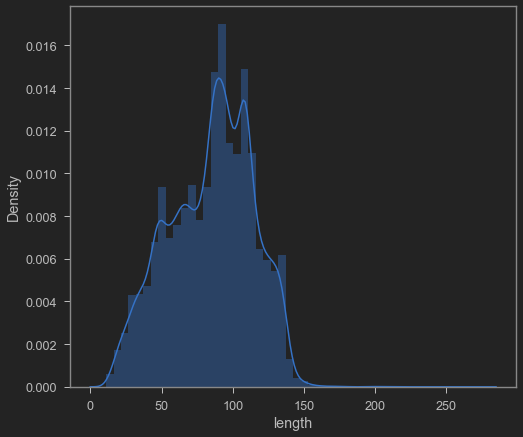

In [15]:
sns.distplot(tweets_df['length'])

In [16]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [17]:
tweets_df[tweets_df['length']==11]['tweet'].iloc[0]

'i love you '

In [18]:
tweets_df[tweets_df['length']==84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [19]:
positive = tweets_df[tweets_df['label'] == 0]
negative = tweets_df[tweets_df['label'] == 1]

# Plotting the word cloud

In [20]:
sentences = tweets_df['tweet'].tolist()

In [21]:
len(sentences)

31962

In [22]:
sentences_as_one_string = ' '.join(sentences)

In [23]:
!pip install WordCloud

You are using pip version 9.0.1, however version 20.3.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


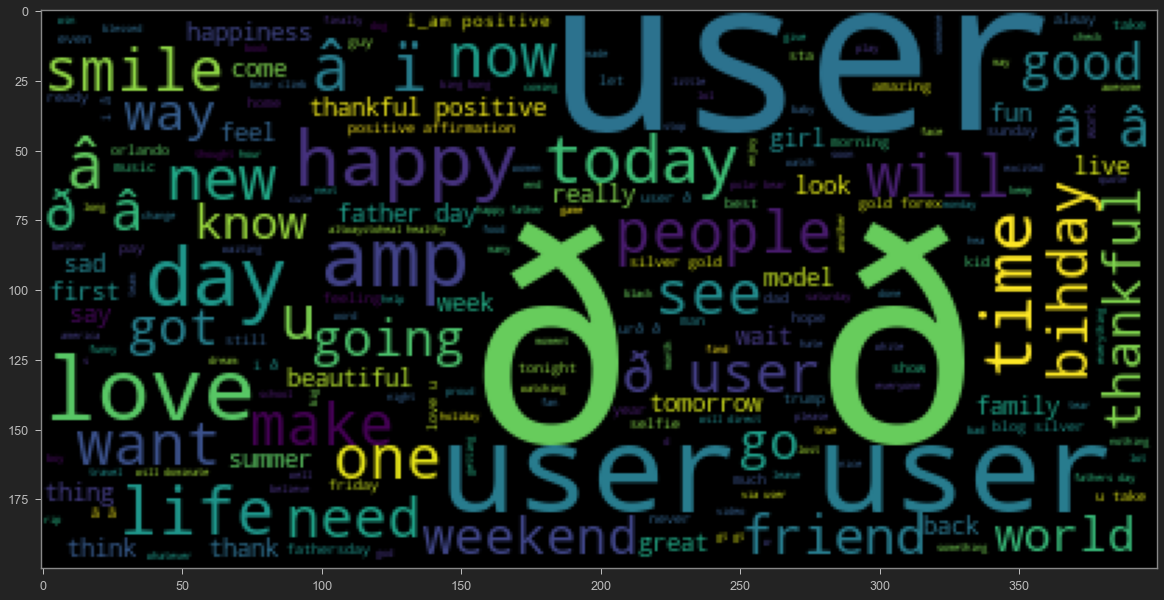

In [24]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

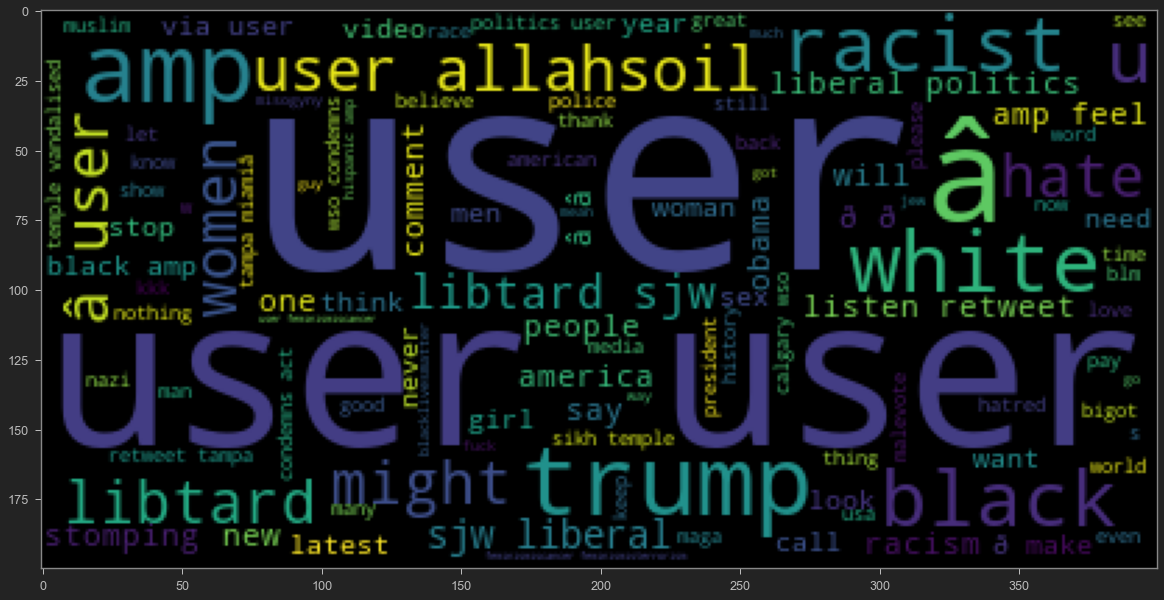

In [25]:
negative_sentences = negative['tweet'].tolist()
negative_in_one_string = " ".join(negative_sentences)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_in_one_string))


# Perform Data Cleaning

## Remove Punctuation from Text 

In [26]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
Test = 'Good morning people :)..!!'

In [28]:
Test_punc_removed = [ char for char in Test if char not in string.punctuation]

In [29]:
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ']

In [31]:
#join the characters again to form the string 
Test_punc_removed_join = "".join(Test_punc_removed)

In [32]:
Test_punc_removed_join

'Good morning people '

## Remove stop words 

In [33]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rk\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [35]:
from nltk.corpus import stopwords 
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
Test_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [38]:
Test_clean

['Good', 'morning', 'people']

## Count Vectorization (Tokenization)

In [40]:
!pip install sklearn
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This paper is the second paper.','And this is the third one.','Is this the  first paper?']

You are using pip version 9.0.1, however version 20.3.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Running setup.py bdist_wheel for sklearn: started
  Running setup.py bdist_wheel for sklearn: finished with status 'done'
  Stored in directory: C:\Users\Rk\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [41]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [42]:
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [43]:
print(X.toarray())

[[0 1 1 0 1 0 1 0 1]
 [0 0 1 0 2 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 1 0 1 0 1]]


## Create a Pipeline to remove Punctuations, Stopwords, and perform Count Vectorization

In [49]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [50]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [51]:
print(tweets_df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [52]:
print(tweets_df['tweet'][5])

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
#vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning , dtype = 'uint8').fit_transform(tweets_df_clean[:1000]).toarray()

In [76]:
tweets_countvectorizer.shape

(1000, 976)

In [77]:
X = tweets_countvectorizer

In [78]:
y = tweets_df['label'][:1000]

# Train a Naive Bayes Classifier Model 

In [79]:
X.shape

(1000, 976)

In [80]:
y.shape

(1000,)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [84]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

#  Access the trained model performance 

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

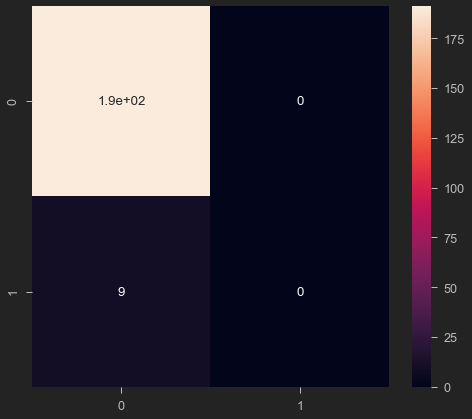

In [87]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [89]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       191
           1       0.00      0.00      0.00         9

    accuracy                           0.95       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.91      0.95      0.93       200



c:\users\rk\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rk\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rk\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo